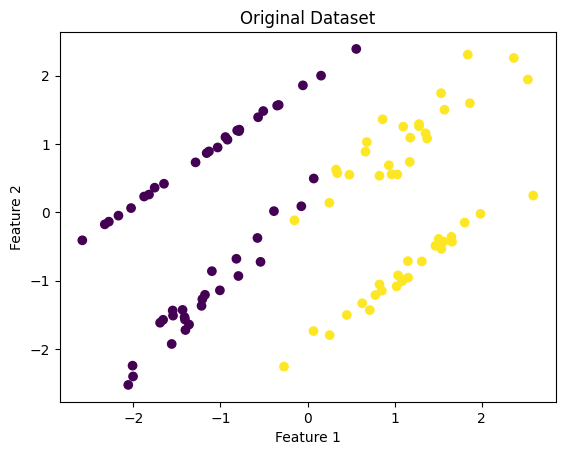

Model Accuracy: 0.95


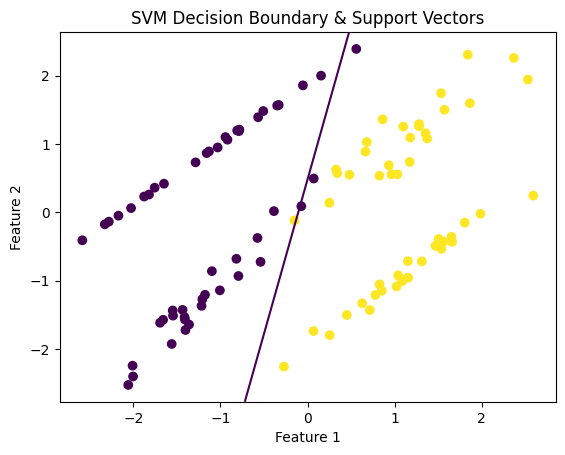

In [ ]:
# =========================
# 1. Import Libraries
# =========================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# =========================
# 2. Create Dataset
# =========================
X, y = make_classification(
    n_samples=100,      # total data points
    n_features=2,       # 2 features so we can plot
    n_classes=2,        # binary classification
    n_informative=2,
    n_redundant=0,
    random_state=42
)


# =========================
# 3. Visualize Dataset
# =========================
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Dataset")
plt.show()


# =========================
# 4. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# =========================
# 5. Create & Train SVM Model
# =========================
model = SVC(kernel='linear', C=0.5)
model.fit(X_train, y_train)


# =========================
# 6. Test Model
# =========================
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


# =========================
# 7. Function to Plot Decision Boundary
# =========================
def plot_boundary(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)

    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy)
    Z = Z.reshape(XX.shape)

    ax.contour(XX, YY, Z, levels=[0])
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        facecolors='none'
    )

    plt.title("SVM Decision Boundary & Support Vectors")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# =========================
# 8. Plot Decision Boundary
# =========================
plot_boundary(model, X, y)
